# SIRモデル(The SIR epidemic model)

SIRモデル（エスアイアールモデル）は、感染症の短期的な流行過程を決定論的に記述する古典的なモデル方程式である。名称はモデルが対象とする

    - 感受性保持者（Susceptible）
    - 感染者（Infected）
    - 免疫保持者（Recovered、あるいは隔離者 Removed）
    
集団における疾患の広がりの簡単な数学的記述は、いわゆるSIRモデルであり、これは$ N $の個体の（固定）集団を、時間の関数$ t $として変化する可能性のある3つの「区画」に分割します。 ：

 * $S(t)$: 感染しやすいがまだ感染していない人;
 * $I(t)$: 感染者の数です;
 * $R(t)$: 病気から回復し、現在免疫力を持っている人たちです.

SIRモデルは、これらの各者の母集団の変化を2つのパラメーターβで記述します。
とγ,βは疾患の有効な接触率を示します。感染した個人は、単位時間あたりβ$ N $の他の個人と接触します（そのうち、疾患にかかりやすい割合は$ S / N $です）。 γは平均回復率です。つまり、1 /γは、感染した個人がそれを伝えることができる平均期間です。

このモデルを記述する微分方程式は、最初にカーマックによって導出されました. Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$\frac{dS}{dt}=−\frac{βSI}{N}$,

$\frac{dI}{dt}=\frac{βSI}{N}−γI$,

$\frac{dR}{dt}=γI$.

次のPythonコードは、N = 1000の母集団（おそらく「学校のインフルエンザ」）のパラメーターβ= 0.2、1 /γ= 10daysで特徴付けられる疾患のこれらの方程式を統合します。 モデルは、0日目に感染した1人の個人から開始されます：$ I（0）= 1 $。 $ S（t）$、$ I（t）$、および$ R（t）$のプロットされた曲線は、Matplotlibのデフォルトよりも少し見栄えがするようにスタイル設定されています。

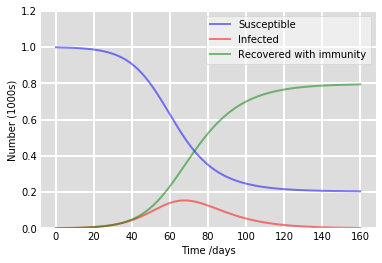

In [34]:
from __future__ import print_function

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Interactive mode

In [35]:
#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import ipywidgets as widgets

# A grid of time points (in days)
t = np.linspace(0, 360, 360)


def simulate(beta=0.2,gamma=0.1):
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    fig.show()
    
interact(simulate, beta=(0.0,1.0,0.05), gamma=(0.0,1.0,0.05))
#beta=widgets.IntSlider(min=0.05, max=1.0, step=.05, value=0.2), 

#ipywLayout = widgets.Layout(border='solid 2px green')
#ipywLayout.display='none'
#widgets.VBox([fig], layout=ipywLayout)

interactive(children=(FloatSlider(value=0.2, description='beta', max=1.0, step=0.05), FloatSlider(value=0.1, d…

<function __main__.simulate(beta=0.2, gamma=0.1)>

## 別の実装：死亡モデルを追加することによる変更 $D(t)$

次のPythonコードは、N = 1000の母集団（おそらく「学校のインフルエンザ」）のパラメーターβ= 0.2、1 /γ= 10daysで特徴付けられる疾患のこれらの方程式を統合します。 モデルは、0日目に感染した1人の個人から開始されます：$ I（0）= 1 $。 $ S（t）$、$ I（t）$、$ R（t）$、および$ D（t）$のプロットされた曲線は、Matplotlibのデフォルトよりも少し見栄えがするようにスタイル設定されています。

$\frac{dI}{dt}=\frac{βSI}{N}−γI-\delta I$,

$\frac{dD}{dt}=\delta I$

In [28]:
import numpy as np
import scipy.integrate 
import matplotlib.pyplot as plt


from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import ipywidgets as widgets

# A grid of time points (in days)
t = np.linspace(0, 360, 360)


In [29]:
def SIRD_model(y, t, beta, gamma, delta):            #adding death separately from recovery
    S, I, R, D = y
    
    dS = -beta*S*I
    dI = beta*S*I - gamma*I - delta*I
    dR = gamma*I
    dD = delta*I
    
    return ([dS, dI, dR, dD])

In [30]:
t = np.linspace(0, 100,1000)

S0 = 0.9
I0 = 0.1
R0 = 0.0
D0 = 0.0
beta = 0.2
gamma = 0.1
delta = 0.15
Ro = beta/(delta+gamma) # R naught : infectious rate
print('R0 =',Ro)
solution = odeint(SIRD_model, [S0, I0, R0, D0], t, args=(beta, gamma, delta))

R0 = 0.8


In [32]:
interact(simulate_SIRD, beta=(0.0,1.0,0.05), gamma=(0.0,1.0,0.05),delta=(0.0,1.0,0.05))

def simulate_SIRD(beta=0.2, gamma=0.1, delta=0.15):
    #Ro=0.0
    #Ro = beta/(delta+gamma) # R naught : infectious rate
    #print('R0 =',Ro)
    solution = odeint(SIRD_model, [S0, I0, R0, D0], t, args=(beta, gamma, delta))
    plt.figure(figsize=[6,4])
    plt.plot(t, solution[:, 0], label="S(t)")
    plt.plot(t, solution[:, 1], label="I(t)")
    plt.plot(t, solution[:, 2], label="R(t)")
    plt.plot(t, solution[:, 3], label="D(t)")
    plt.grid()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Proportions")
    plt.title("SIRD model")
    
    plt.show()



interactive(children=(FloatSlider(value=0.2, description='beta', max=1.0, step=0.05), FloatSlider(value=0.1, d…

## SEIR model: adding E as Exposed but not sick (maybe asymptomatic) Infectious



このモデルを記述する微分方程式は、最初にカーマックによって導出されました. Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$\frac{dS}{dt}=−\frac{βSI}{N}$,

$\frac{dI}{dt}=\frac{βSI}{N}−γI$,

$\frac{dR}{dt}=γI$.

$S + I + R = N

次のPythonコードは、N = 1000の母集団（おそらく「学校のインフルエンザ」）のパラメーターβ= 0.2、1 /γ= 10daysで特徴付けられる疾患のこれらの方程式を統合します。 モデルは、0日目に感染した1人の個人から開始されます：$ I（0）= 1 $。 $ S（t）$、$ I（t）$、および$ R（t）$のプロットされた曲線は、Matplotlibのデフォルトよりも少し見栄えがするようにスタイル設定されています。

## Reference

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
